In [1]:
import bluecat as bc

In [2]:
import pandas as pd
from pathlib import Path
df = pd.read_csv(Path('./data/data.csv'), index_col = "date",parse_dates=["date"])

In [3]:
df.head()

,obs,sim
date,,
1992-01-01,4.45,15.000000
1992-01-02,4.31,14.381293
1992-01-03,4.35,13.788106
1992-01-04,4.26,13.219407
1992-01-05,4.18,12.674306


In [4]:
cal = df["1992-01-01":"2011-12-31"]
test = df["2012-01-01":]
qcalib = cal['sim'].to_numpy()
qcalibobs = cal['obs'].to_numpy()
qsim = test['sim'].to_numpy()
qobs = test['obs'].to_numpy()
m = 100
siglev = 0.05

In [11]:
qsim.ndim

1

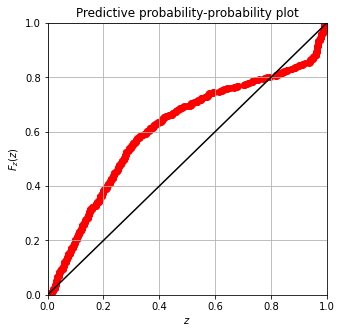

In [7]:
app = bc.Bluecat(qsim, qcalib, qcalibobs,
    m,siglev, bc.EmpiricalEstimation(),
    qobs, prob_plot=True)
app.sim()
app.plot_ppp()

In [24]:
app.opt

     fun: 50.29724171751553
 message: 'Optimization terminated successfully.'
    nfev: 3015
     nit: 49
 success: True
       x: array([0.41013665, 0.96886394, 7.29459938, 0.39183079])

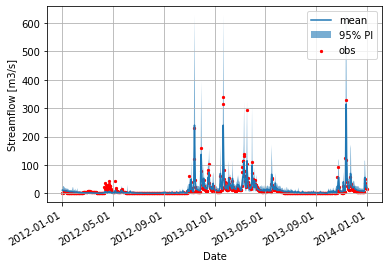

In [52]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
x = df["2012-01-01":].index.values
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.plot(x,app.medpred, label="mean")
plt.fill_between(x, app.suppred, app.infpred, alpha =.6, label="95% PI")
plt.scatter(x, app.qobs, color='red', s=5, label="obs")
plt.gcf().autofmt_xdate()
plt.legend()
plt.ylabel("Streamflow [m3/s]")
plt.xlabel("Date")
plt.grid()


In [54]:
import numpy as np
out = np.vstack((app.medpred,app.infpred,app.suppred)).transpose()

In [55]:
import pandas as pd
outdata = pd.DataFrame(out, columns=['medpred','infpred','suppred'])

In [56]:
outdata.head()

,medpred,infpred,suppred
0,11.267851,3.660,26.670
1,10.306289,3.765,20.700
2,10.541816,3.954,25.537
3,10.357736,3.510,25.537
4,10.067139,3.293,23.910


In [57]:
outdata.to_csv('data/emp.csv', index=False)

In [58]:
indata = pd.read_csv('data/emp.csv')

In [59]:
indata.head()

,medpred,infpred,suppred
0,11.267851,3.660,26.670
1,10.306289,3.765,20.700
2,10.541816,3.954,25.537
3,10.357736,3.510,25.537
4,10.067139,3.293,23.910


In [6]:
from dataclasses import dataclass
import numpy as np
@dataclass(slots=True)
class BluecatData:
    qsim: np.ndarray
    qcalib: np.ndarray
    qcalibobs: np.ndarray
    m: int
    siglev: float
    qobs: np.ndarray | None = None
    prob_plot: bool = False

In [14]:
a = BluecatData(qsim, qcalib, qcalibobs, 100, 0.05, qobs, True)